In [1]:
%pylab inline

import sys
sys.path.append('../src/')
import leapfrog_bfe 
from gala import potential as gp
from astropy import units as u
import scipy.linalg as la 
import gala.dynamics as gd


from gala.potential.scf import compute_coeffs
from profiles import Hernquist 
from gala.units import galactic
from profiles import G

Populating the interactive namespace from numpy and matplotlib


In [2]:
figs_path = "../../time-dependent-scf/notebooks/figures/intertial_vs_non-intertial_ex/"

# SCF vs gala static 

In [3]:
# satellite halo
def density_func(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) # * u.kpc
    M = 1E11 # u.Msun 
    rs = 1 #*u.kpc
    rho0 = M/(2*np.pi*rs**3)
    return rho0 / ((r/rs) *(1+r/rs)**3)

nmax=10
lmax=1
scf_coeffs = compute_coeffs(density_func, nmax=nmax, lmax=lmax, M=1E11, r_s=1)
S = scf_coeffs[0][0]
T = scf_coeffs[1][0]

In [4]:
# ics x, y, z, vx, vy, vz. Positions in kpc and velocities in kpc/gyr
ics = [30, 0, 0, 
       0, (80*u.km/u.s).to(u.kpc/u.Gyr).value, 0]

orbit_scf = leapfrog_bfe.integrate_bfe(q=ics, dt=0.001, tmax=8, S=S, T=T , nmax=nmax, lmax=lmax, 
                                        G=G, Mass=1E11, rs=1, disk=0, LMC=0)

In [5]:
t_orb = orbit_scf[0]
x_orb = orbit_scf[1]
y_orb = orbit_scf[2]
z_orb = orbit_scf[3]
vx_orb = orbit_scf[4]
vy_orb = orbit_scf[5]
vz_orb = orbit_scf[6]
r_orb = np.sqrt(x_orb**2 + y_orb**2 + z_orb**2)

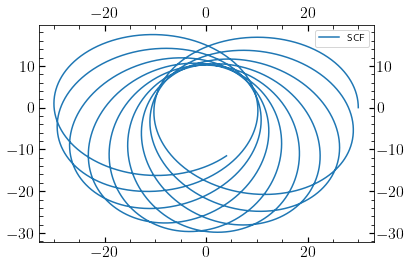

In [6]:
plot(x_orb, y_orb, label='SCF')
#plot(orbit.x, orbit.y, label='Gala')
legend()

In [7]:
# Gala
pot = gp.HernquistPotential(m=1E11*u.Msun, c=1, units=galactic)

In [8]:
w0 = gd.PhaseSpacePosition(pos=[30, 0 ,0] * u.kpc,
                            vel=[0, 80, 0] * u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(w0, dt=0.001*u.Gyr, n_steps=8000-1)

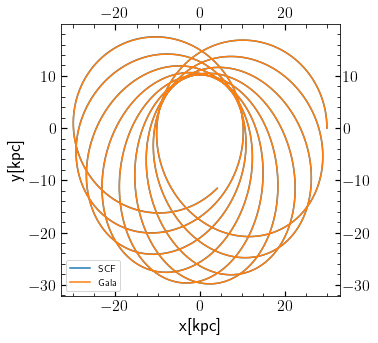

In [9]:
figsize(5,5)
plot(x_orb, y_orb, label='SCF')
plot(orbit.x, orbit.y, label='Gala')
legend()
xlabel('x[kpc]')
ylabel('y[kpc]')
savefig(figs_path + "test_with_gala.png", bbox_inches='tight')

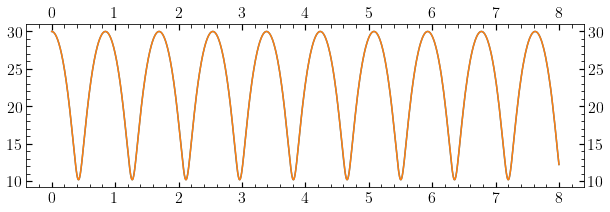

In [10]:
figure(figsize=(10, 3))
plot(t_orb, r_orb)
plot(t_orb, np.sqrt(orbit.x**2 + orbit.y**2 + orbit.z**2))

# SCF composite static

In [11]:

def density_func_host(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2) # * u.kpc
    M = 1E12 # u.Msun 
    rs = 1 #*u.kpc
    rho0 = M/(2*np.pi*rs**3)
    return rho0 / ((r/rs) *(1+r/rs)**3)

nmax=10
lmax=1
scf_coeffs_host = compute_coeffs(density_func_host, nmax=nmax, lmax=lmax, M=1E12, r_s=1)
S_sat = scf_coeffs_host[0][0]
T_sat = scf_coeffs_host[1][0]

In [12]:
# 

orbit_scf_comp = leapfrog_bfe.integrate_bfe(q=ics, dt=0.001, tmax=8, S=S, T=T , nmax=10, lmax=1, 
                                            G=G, Mass=1E11, rs=1, disk=0, 
                                            LMC=1, Slmc=S_sat, Tlmc=T_sat, x_lmc=-700, y_lmc=0, z_lmc=0, rs_lmc=1,
                                           nmax_lmc=10, lmax_lmc=1, Mass_lmc=1E12)

In [13]:
t_comp = orbit_scf_comp[0]
x_comp = orbit_scf_comp[1]
y_comp = orbit_scf_comp[2]
z_comp = orbit_scf_comp[3]
vx_comp = orbit_scf_comp[4]
vy_comp = orbit_scf_comp[5]
vz_comp = orbit_scf_comp[6]
r_comp = np.sqrt(x_comp**2 + y_comp**2 + z_comp**2)

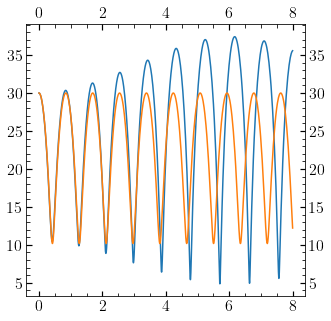

In [14]:
plot(t_comp, r_comp)
plot(t_orb, r_orb)

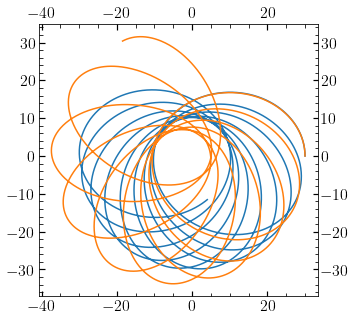

In [15]:
plot(x_orb, y_orb)
plot(x_comp, y_comp)

# SCF time-dependent

In [16]:
import bfe_fields as bfe

In [17]:
S_all = np.zeros((80000, 11, 2, 2))
T_all = S_all
for k in range(80000):
    S_all[k] = S

In [18]:
com = np.zeros((80000, 3)) 
com[:,0] = np.arange(0, 8, 0.0001)

In [19]:
orbit_scf_t = leapfrog_bfe.integrate_bfe_t(q=np.array([30, 0, 0, 0, (80*u.km/u.s).to(u.kpc/u.Gyr).value, 0]), time=np.arange(0, 8, 0.0001),
                                           S=S_all, T=T_all , nmax=nmax, lmax=lmax, 
                                           exp_com = np.zeros((80000, 3)), exp_acc=np.zeros((80000,3)),
                                           G=G, Mass=1E11, rs=1, com=com, disk=0, LMC=0)

-468.10636331629144 0.0


In [20]:
t_scft = orbit_scf_t[0]
x_scft = orbit_scf_t[1]
y_scft = orbit_scf_t[2]
z_scft = orbit_scf_t[3]
vx_scft = orbit_scf_t[4]
vy_scft = orbit_scf_t[5]
vz_scft = orbit_scf_t[6]
r_scft = np.sqrt(x_scft**2 + y_scft**2 + z_scft**2)

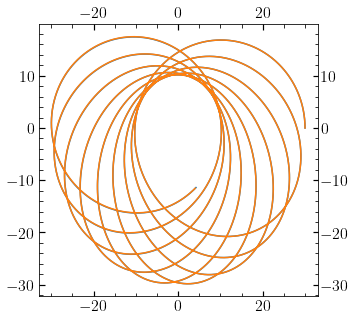

In [21]:
plot(x_scft, y_scft)
plot(x_orb, y_orb)

In [22]:
## GALA set up

# Design gala potential using Nbody and a test particle


# Present-day position/velocity in inertial frame moving with instantaneous 
# Milky Way velocity:
w0_mw = gd.PhaseSpacePosition(
    pos=[0, 0, 0]*u.kpc,
    vel=[0, 0, 0]*u.km/u.s,
)
pot_mw = gp.HernquistPotential(m=1e12*u.Msun, c=1*u.kpc, units=galactic)

# Values from Vasiliev et al. 2020
w0_lmc = gd.PhaseSpacePosition(
    pos=[1200, 200, 0]*u.kpc,
    vel=[-300, 0, 0]*u.km/u.s,
)

w0_test = gd.PhaseSpacePosition(
    pos=[1230, 200, 0]*u.kpc,
    vel=[-300, 80, 0]*u.km/u.s,
)


pot_lmc = gp.HernquistPotential(m=1e11*u.Msun, c=1*u.kpc, units=galactic)

w0 = gd.combine((w0_mw, w0_lmc, w0_test))
nbody = gd.DirectNBody(w0, [pot_mw, pot_lmc, None])

w1 = gd.combine((w0_lmc, w0_test))
isolated = gd.DirectNBody(w1, [pot_lmc, None])

dt = 0.1*u.Myr
tmax = 8*u.Gyr
nsteps = int((tmax/dt).to(u.Gyr/u.Gyr).value)
t_orbit = np.linspace(0, tmax, nsteps)


# Full : Host - Satellite - test particle 
orbits = nbody.integrate_orbit(dt=dt, t1=0*u.Gyr, t2=tmax)


# Orbit quantities full orbit 
pos_halo = np.array([orbits.xyz[:,:,0].to(u.kpc).value])
pos_sat = np.array([orbits.xyz[:,:,1].to(u.kpc).value])
pos_tp = np.array([orbits.xyz[:,:,2].to(u.kpc).value])

vel_halo = np.array([orbits.v_xyz[:,:,0].to(u.km/u.s).value])
vel_sat = np.array([orbits.v_xyz[:,:,1].to(u.km/u.s).value])
vel_tp = np.array([orbits.v_xyz[:,:,2].to(u.km/u.s).value])


r_halo = (np.sum(orbits.xyz[:,:,0]**2, axis=0))**0.5
r_sat = (np.sum(orbits.xyz[:,:,1]**2, axis=0))**0.5
r_tp = (np.sum(orbits.xyz[:,:,2]**2, axis=0))**0.5

v_halo = (np.sum(orbits.v_xyz[:,:,0].to(u.km/u.s).value**2, axis=0))**0.5
v_sat = (np.sum(orbits.v_xyz[:,:,1].to(u.km/u.s).value**2, axis=0))**0.5
v_tp = (np.sum(orbits.v_xyz[:,:,2].to(u.km/u.s).value**2, axis=0))**0.5


rtp_r2_sat = np.sum((np.array(orbits.xyz[:,:,2].to(u.kpc).value-orbits.xyz[:,:,1].to(u.kpc).value))**2, axis=0)**0.5
vtp_r2_sat = np.sum((np.array(orbits.v_xyz[:,:,2].to(u.km/u.s).value-orbits.v_xyz[:,:,1].to(u.km/u.s).value))**2, axis=0)**0.5


In [23]:
sat_com = pos_sat[0].T - pos_sat[0][:,0]
sat_vcom = vel_sat[0].T - vel_sat[0][:,0]


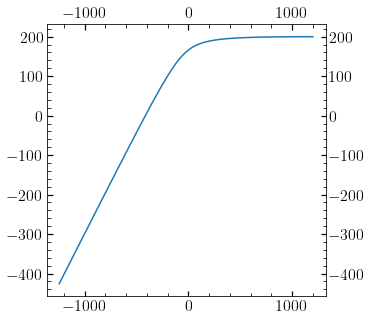

In [24]:
plot(pos_sat[0][0], pos_sat[0][1])

In [25]:
orbit_scft_com = leapfrog_bfe.integrate_bfe_t(q=np.array([30, 0, 0, (-300*u.kpc/u.Gyr).to(u.km/u.s).value, (80*u.kpc/u.Gyr).to(u.km/u.s).value, 0]),
                                              time=np.arange(0, 8.0001, 0.0001),
                                              S=S_all, T=T_all , nmax=nmax, lmax=lmax, 
                                              G=G, Mass=1E11, rs=1, exp_com=sat_com,  exp_acc=np.zeros((80000,3)),
                                              disk=0, LMC=0)

-468.10636331629144 0.0


In [26]:
t_scft_com = orbit_scft_com[0]
x_scft_com = orbit_scft_com[1]
y_scft_com = orbit_scft_com[2]
z_scft_com = orbit_scft_com[3]
vx_scft_com = orbit_scft_com[4]
vy_scft_com = orbit_scft_com[5]
vz_scft_com = orbit_scft_com[6]
r_scft_com = np.sqrt(x_scft_com**2 + y_scft_com**2 + z_scft_com**2)
r_scft_com_sat = np.sqrt((x_scft_com-sat_com[:,0])**2 + (y_scft_com-sat_com[:,1])**2 + (z_scft_com-sat_com[:,2])**2)

v_scft_com_sat = np.sqrt((vx_scft_com-sat_vcom[:,0])**2 + (vy_scft_com-sat_vcom[:,1])**2 + (vz_scft_com-sat_vcom[:,2])**2)

In [27]:
## Comparisson with Gala - shift COM orbit  
sat_vcom = np.zeros_like(sat_com)*u.km/u.s

w0_scf_mov = gd.PhaseSpacePosition(
    pos=[30, 0, 0]*u.kpc,
    vel=[-300, 80, 0]*u.km/u.s,
)

#nsnaps = 1000
nsnaps = nsteps


sat_scf_tdp_mov = gp.scf.InterpolatedSCFPotential(m=1E11*u.Msun, r_s=1*u.kpc, Sjnlm=S_all, Tjnlm=T_all, 
                                              tj=np.linspace(0, 8, nsnaps)*u.Gyr, com_xj=sat_com*u.kpc, com_vj=sat_vcom,
                                              units=galactic)

orbit_scf_tdp_mov = gp.Hamiltonian(sat_scf_tdp_mov).integrate_orbit(w0_scf_mov, dt=dt, t1=0*u.Gyr, t2=tmax)
pos_scf_tdp_mov = orbit_scf_tdp_mov.xyz.value.T
vel_scf_tdp_mov = orbit_scf_tdp_mov.v_xyz.to(u.km/u.s).value.T

r_scf_tdp_mov = (np.sum(pos_scf_tdp_mov**2, axis=1))**0.5
v_scf_tdp_mov = (np.sum(vel_scf_tdp_mov**2, axis=1))**0.5

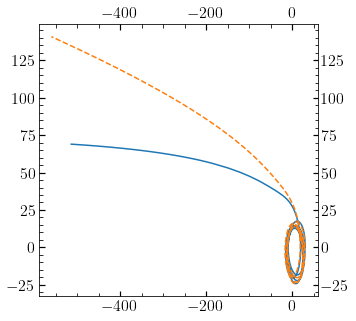

In [28]:
plot(x_scft_com-sat_com[:,0], y_scft_com-sat_com[:,1])
plot(pos_scf_tdp_mov[:,0]-sat_com[:,0], pos_scf_tdp_mov[:,1]-sat_com[:,1], ls='--', label='SCF moving')


(0.0, 40.0)

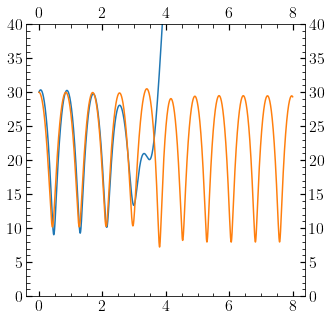

In [29]:
#plot(t_scft_com, r_scft_com)
#plot(t_scft_com, r_scft_com)
plot(t_scft_com, r_scft_com_sat)
#plot(t_scft_com, (np.sum((pos_scf_tdp_mov-sat_com)**2, axis=1))**0.5, ls='--')
plot(t_scft_com, rtp_r2_sat, label='N-body')
ylim(0, 40)

In [30]:
vtp_r2_sat

array([80.        , 80.00001024, 80.00003416, ..., 73.92120514,
       73.92681364, 73.93244079])

In [31]:
v_scft_com_sat

array([303.58834532, 303.63330539, 303.67825176, ..., 430.68675722,
       430.68692972, 430.68688377])

## Fictitous force vs full N-body

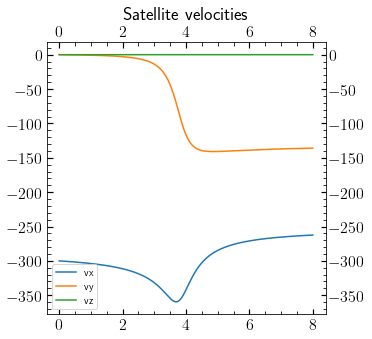

In [32]:
## 
title('Satellite velocities', fontsize=18)
plot(t_scft_com, vel_sat[0][0], label='vx')
plot(t_scft_com, vel_sat[0][1], label='vy')
plot(t_scft_com, vel_sat[0][2], label='vz')
legend()

In [33]:
dt = t_scft_com[1]-t_scft_com[0]

In [34]:
dt

0.0001

In [35]:
ax_sat = np.diff(np.array([vel_sat[0][0]]), axis=1)/dt*u.km/u.s/u.Gyr
ay_sat = np.diff(np.array([vel_sat[0][1]]), axis=1)/dt*u.km/u.s/u.Gyr

Text(0, 0.5, 'km/s/Gyr')

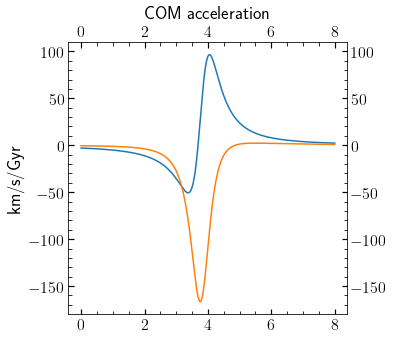

In [36]:
title('COM acceleration', fontsize=18)
plot(t_scft_com[:-1], ax_sat[0])
plot(t_scft_com[:-1], ay_sat[0])
ylabel('km/s/Gyr')

In [37]:
# Transform to kpc/Gyr^2
ax_ru = np.zeros_like(t_scft_com)
ay_ru = np.zeros_like(t_scft_com)

ax_ru[1:] = ax_sat.to(u.kpc/u.Gyr**2).value
ay_ru[1:] = ay_sat.to(u.kpc/u.Gyr**2).value

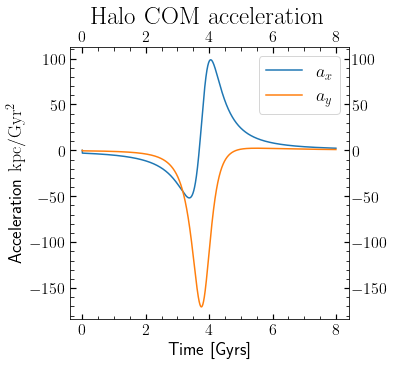

In [38]:
plot(t_scft_com, ax_ru, label='$a_x$')
plot(t_scft_com, ay_ru, label='$a_y$')
title(r'$\rm{Halo\ COM\ acceleration}$', fontsize=25)
xlabel('Time [Gyrs]')
legend(fontsize=18)
ylabel(r'Acceleration $\rm{kpc/Gyr^2}$')
savefig(figs_path+"halo_com_acceleration.png", bbox_inches='tight')
savefig(figs_path+"halo_com_acceleration.pdf", bbox_inches='tight')

In [39]:
orbit_scft_acom = leapfrog_bfe.integrate_bfe_t(q=np.array([30, 0, 0, (-300*u.kpc/u.Gyr).to(u.km/u.s).value, (80*u.kpc/u.Gyr).to(u.km/u.s).value, 0]), 
                                               time=np.linspace(0, 8.0, 80000),
                                               S=S_all, T=T_all , nmax=nmax, lmax=lmax, 
                                               G=G, Mass=1E11, rs=1, exp_com=sat_com,
                                               exp_acc = -np.array([ax_ru, ay_ru, np.zeros_like(ax_ru)]).T,
                                               disk=0, LMC=0)

-468.10636331629144 0.0


In [40]:
t_scft_acom = orbit_scft_acom[0]
x_scft_acom = orbit_scft_acom[1]
y_scft_acom = orbit_scft_acom[2]
z_scft_acom = orbit_scft_acom[3]
vx_scft_acom = orbit_scft_acom[4]
vy_scft_acom = orbit_scft_acom[5]
vz_scft_acom = orbit_scft_acom[6]
r_scft_acom = np.sqrt(x_scft_acom**2 + y_scft_acom**2 + z_scft_acom**2)
r_scft_acom_sat = np.sqrt((x_scft_acom-sat_com[:-1,0])**2 + (y_scft_acom-sat_com[:-1,1])**2 + (z_scft_acom-sat_com[:-1,2])**2)

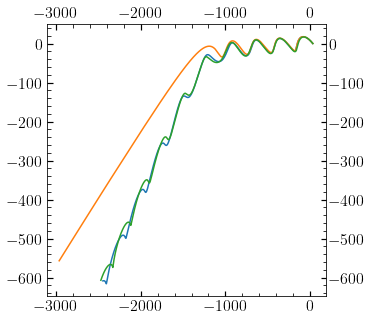

In [41]:
plot(x_scft_acom, y_scft_acom)
plot(x_scft_com, y_scft_com)
plot(pos_tp[0][0]-pos_tp[0][0][0]+30, pos_tp[0][1]-pos_tp[0][1][0])

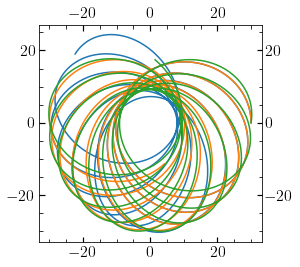

In [42]:
figsize(4, 4)

plot(pos_tp[0][0]-pos_sat[0][0], pos_tp[0][1]-pos_sat[0][1])
plot(x_scft, y_scft)
#plot(x_scft_com-sat_com[:,0], y_scft_com-sat_com[:,1])

plot(x_scft_acom-sat_com[:-1,0], y_scft_acom-sat_com[:-1,1])


Text(0, 0.5, 'Distance $\\rm{kpc}$')

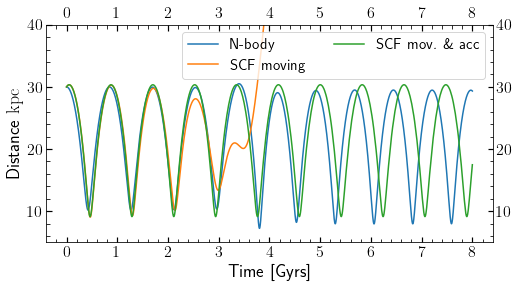

In [43]:
figsize(8, 4)
plot(t_scft_com, rtp_r2_sat, label='N-body')
plot(t_scft_com, r_scft_com_sat, label='SCF moving')
plot(t_scft_com[:-1], r_scft_acom_sat, label='SCF mov. \& acc')
#plot(t_scft_com[:-1], r_scft, label='Isolated')
legend(fontsize=15, ncol=2)
ylim(5, 40)


xlabel('Time [Gyrs]')
ylabel(r'Distance $\rm{kpc}$')
#savefig(figs_path+"nbody_vs_fictitous.png", bbox_inches='tight')

(-10.0, 10.0)

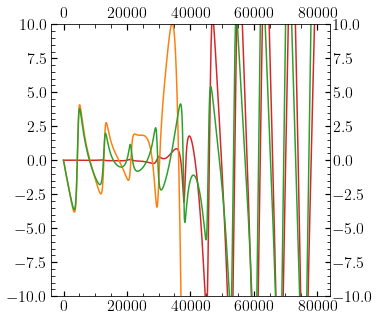

In [480]:
plot((rtp_r2_sat[:-1]-r_scft), c='C3')
plot((rtp_r2_sat-r_scft_com_sat), c='C1')
plot((rtp_r2_sat[:-1]-r_scft_acom_sat), c='C2')
ylim(-10, 10)

In [106]:
# Coriolis force



# rotating forces

#ax_rot = x*d_ax
#ay_rot = y*d_ay
#az_rot = z*d_az


In [322]:
pos_norm = (pos_sat[0][0]**2 + pos_sat[0][1]**2 + pos_sat[0][2]**2)**0.5

In [323]:
usat_x = pos_sat[0][0]/pos_norm
usat_y = pos_sat[0][1]/pos_norm
usat_z = pos_sat[0][2]/pos_norm

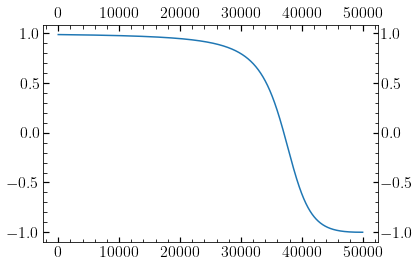

In [324]:
plot(usat_x)

In [325]:
d_usat_x = np.diff(usat_x, axis=0)
d_usat_y = np.diff(usat_y, axis=0)


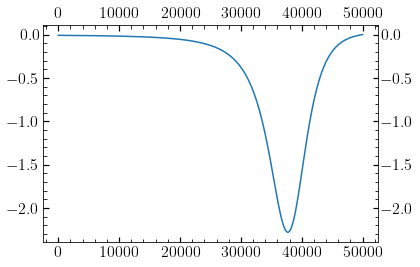

In [346]:
plot(d_usat_x/dt)

In [327]:
d2_usat_x = np.diff(d_usat_x, axis=0)
d2_usat_y = np.diff(d_usat_y, axis=0)

ax_cent = np.zeros_like(d_usat_x)
ay_cent = np.zeros_like(d_usat_x)
az_cent = np.zeros_like(d_usat_x)

ax_cent[:-1] = d2_usat_x/dt**2 * pos_sat[0][0][:-2]
ay_cent[:-1] = d2_usat_y/dt**2 * pos_sat[0][1][:-2]

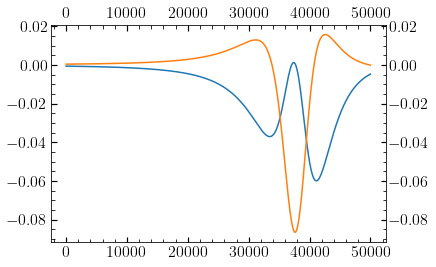

In [344]:
plot(d2_usat_x/dt * pos_sat[0][0][:-2])
plot(d2_usat_y/dt * pos_sat[0][1][:-2])

In [342]:
dt

0.0001

In [329]:
ax_cor = 2*vel_sat[0][0][:-1]*d_usat_x/dt*u.km/u.s/u.Gyr
ay_cor = 2*vel_sat[0][1][:-1]*d_usat_y/dt *u.km/u.s/u.Gyr 
az_cor = 2*vel_sat[0][2][:-1]*np.zeros_like(d_usat_x) *u.km/u.s/u.Gyr 

Text(0, 0.5, 'Acceleration $\\rm{kpc/Gyr^2}$')

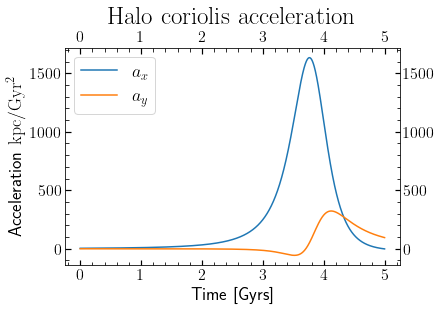

In [341]:
plot(t_scft_com[:-1], ax_cor, label='$a_x$')
plot(t_scft_com[:-1], ay_cor, label='$a_y$')
title(r'$\rm{Halo\ coriolis\ acceleration}$', fontsize=25)
xlabel('Time [Gyrs]')
legend(fontsize=18)
ylabel(r'Acceleration $\rm{kpc/Gyr^2}$')

In [340]:
plot(t_scft_com[:-1], ax_cent.to(u.kpc/u.Gyr**2), label='$a_x$')
plot(t_scft_com[:-1], ay_cent.to(u.kpc/u.Gyr**2), label='$a_y$')
title(r'$\rm{Halo\ centrifugal\ acceleration}$', fontsize=25)
xlabel('Time [Gyrs]')
legend(fontsize=18)
ylabel(r'Acceleration $\rm{kpc/Gyr^2}$')

AttributeError: 'numpy.ndarray' object has no attribute 'to'

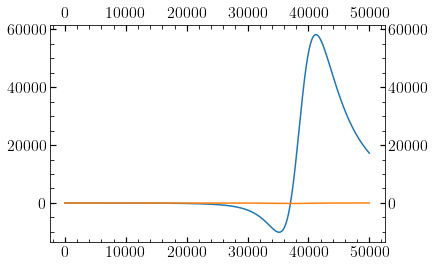

In [331]:
#plot(ay_cor.to(u.kpc/u.Gyr**2))
plot(ay_cor*180)
plot(ay_ru[0])

In [332]:
orbit_scft_acom_cor = leapfrog_bfe.integrate_bfe_t(q=np.array([30, 0, 0, -300, 80, 0]), time=np.linspace(0, 5.0, 49999),
                                               S=S_all, T=T_all , nmax=nmax, lmax=lmax, 
                                               G=G, Mass=1E11, rs=1, exp_com=sat_com,
                                               exp_acc = -np.array([ax_ru[0]+ax_cor.value+ax_cent, 
                                                                    ay_ru[0]+ay_cor.value+ay_cent, np.zeros_like(ax_ru[0])]).T,
                                               disk=0, LMC=0)

-468.10636331629144 0.0


In [333]:
t_scft_acom_cor = orbit_scft_acom_cor[0]
x_scft_acom_cor = orbit_scft_acom_cor[1]
y_scft_acom_cor = orbit_scft_acom_cor[2]
z_scft_acom_cor = orbit_scft_acom_cor[3]
vx_scft_acom_cor = orbit_scft_acom_cor[4]
vy_scft_acom_cor = orbit_scft_acom_cor[5]
vz_scft_acom_cor = orbit_scft_acom_cor[6]
r_scft_acom_cor = np.sqrt(x_scft_acom_cor**2 + y_scft_acom_cor**2 + z_scft_acom_cor**2)
r_scft_acom_cor_sat = np.sqrt((x_scft_acom_cor-sat_com[:-2,0])**2 + 
                              (y_scft_acom_cor-sat_com[:-2,1])**2 + 
                              (z_scft_acom_cor-sat_com[:-2,2])**2)

(0.0, 100.0)

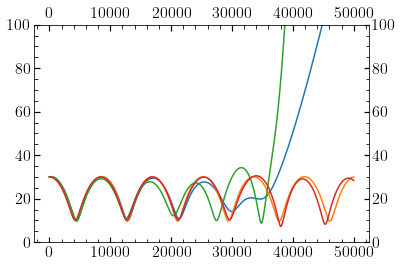

In [334]:
plot(r_scft_com_sat)
plot(r_scft_acom_sat)
plot(r_scft_acom_cor_sat)
plot(rtp_r2_sat, label='N-body')

ylim(0, 100)


In [ ]:
a